**Data Preparation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape

(270, 14)

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

**Data Cleaning**

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
df['Heart Disease']=encoder.transform(df['Heart Disease'])
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [7]:
present=df[df['Heart Disease']==1]
absent=df[df['Heart Disease']==0]
present.shape, absent.shape

((120, 14), (150, 14))

In [8]:
absent=absent.sample(present.shape[0])
absent.shape, present.shape

((120, 14), (120, 14))

**Histogram**

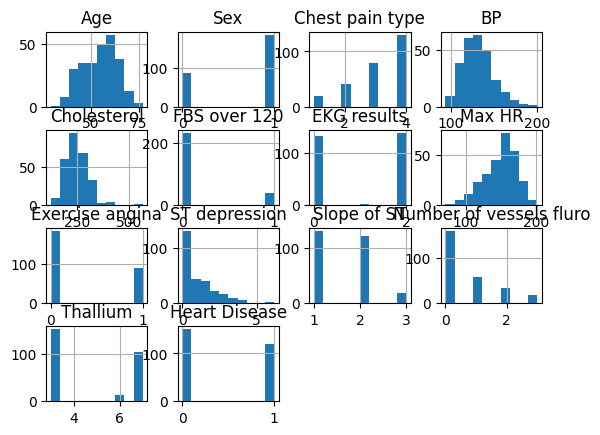

In [9]:
histogram=df.hist()

**HeatMap**

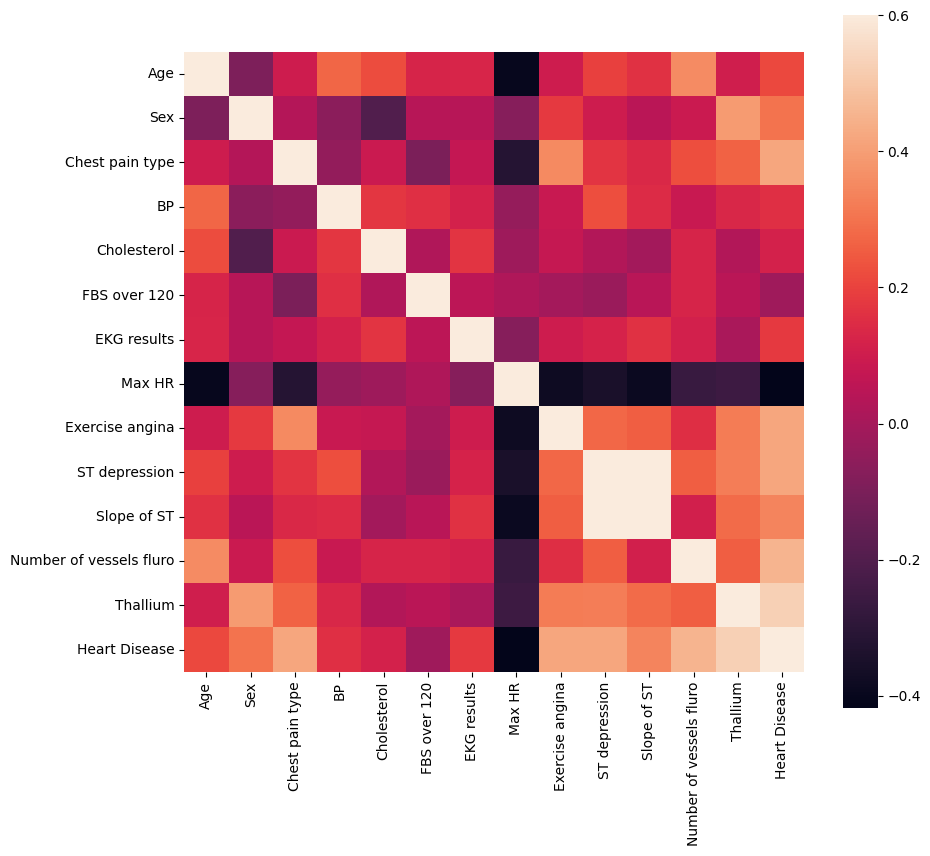

In [10]:
import statsmodels.api as sm
corrmat = df.corr()
fig = plt.figure(figsize = (10, 9))
sns.heatmap(corrmat, vmax = .6, square = True)
plt.show()

**BarPlot**

<Axes: xlabel='Sex', ylabel='Heart Disease'>

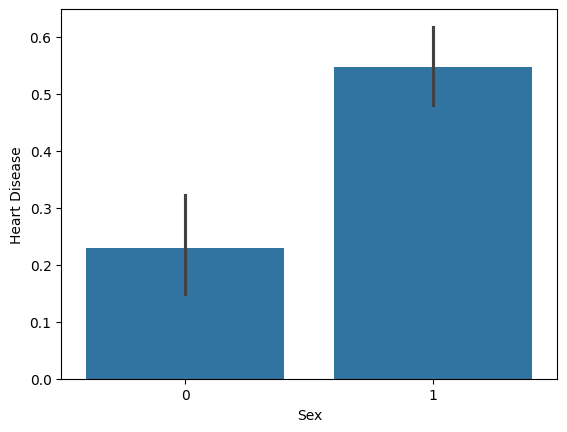

In [11]:
sns.barplot(data=df,y='Heart Disease',x='Sex')

**Data Splitting**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
x = np.array(df.drop(columns='Heart Disease'))
y = np.array(df['Heart Disease'])
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.8)
x_scaled[0]

array([ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
       -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
        0.67641928,  2.47268219, -0.87570581])

**Building the Logistic Regression Model**

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred2 = logreg.predict(x_test)
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred2))

Accuracy of the model is = 0.8148148148148148


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
yPred = rfc.predict(x_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(present)
n_errors = (yPred != y_test).sum()
acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.7777777777777778
The precision is 0.7619047619047619
The recall is 0.6956521739130435
The F1-Score is 0.7272727272727272
